In [9]:
# Utilizando GPU

import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(device)


cuda


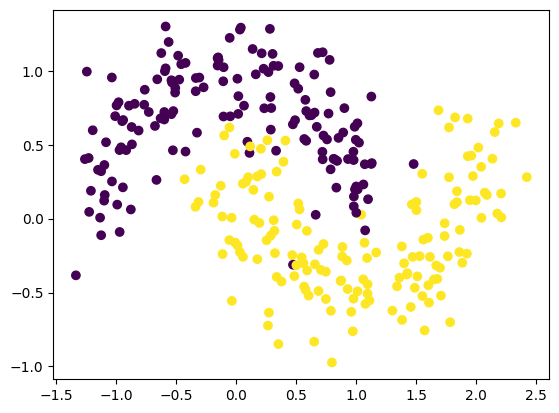

In [10]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=300, noise=0.2)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()


In [11]:
import torch
from torch import nn

input_size = 2
hidden_size = 8
output_size = 1

net = nn.Sequential(nn.Linear(in_features=input_size, out_features=hidden_size), 
                    nn.ReLU(),
                    nn.Linear(in_features=hidden_size, out_features=output_size))

net = net.to(device)

print(net)


Sequential(
  (0): Linear(in_features=2, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=1, bias=True)
)


In [12]:
from torchsummary import summary

summary(net, input_size=(1, input_size))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 1, 8]              24
              ReLU-2                 [-1, 1, 8]               0
            Linear-3                 [-1, 1, 1]               9
Total params: 33
Trainable params: 33
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [13]:
tensor = torch.from_numpy(X).float()

tensor = tensor.to(device)

pred = net(tensor)

print(pred.size())

torch.Size([300, 1])


In [14]:
class MinhaRede(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MinhaRede, self).__init__()
        self.hidden = nn.Linear(in_features=input_size, out_features=hidden_size)
        self.relu = nn.ReLU()
        self.output = nn.Linear(in_features=hidden_size, out_features=output_size)

    def forward(self, x):
        hidden = self.relu(self.hidden(x))
        output = self.output(hidden)
        return output

In [15]:
net = MinhaRede(input_size=input_size, hidden_size=hidden_size, output_size=output_size)

net = net.to(device)

print(net)

summary(net, input_size=(1, input_size))

MinhaRede(
  (hidden): Linear(in_features=2, out_features=8, bias=True)
  (relu): ReLU()
  (output): Linear(in_features=8, out_features=1, bias=True)
)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 1, 8]              24
              ReLU-2                 [-1, 1, 8]               0
            Linear-3                 [-1, 1, 1]               9
Total params: 33
Trainable params: 33
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [16]:
tensor = torch.from_numpy(X).float()

tensor = tensor.to(device)

pred = net(tensor)

print(pred.size())


torch.Size([300, 1])
